In [15]:
#Imports 

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import random
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

## Target Data

In [ ]:
# Create an empty list to store results
milk_data = []

In [25]:
# Configure Chrome options
chrome_options = Options()
chrome_options.add_argument("--disable-blink-features=AutomationControlled")
chrome_options.add_argument("--window-size=1920x1080")

# Start the WebDriver
driver = webdriver.Chrome(options=chrome_options)
driver.get('https://www.target.com/p/milk-good-gather/-/A-94602358?preselect=13276134#lnk=sametab')

time.sleep(5)

# Extract price
price = driver.find_element('xpath', '//*[@id="above-the-fold-information"]/div[6]/div/div/div[1]/span/span[1]').text
time.sleep(4)

# Store results
milk_data.append({"Zip Code": '17013', "Price": price})
print(f"✅ Zip Code: {'17013'}, Price: {price}")
        
time.sleep (2)

# Click 'Add to cart'
add_cart = driver.find_element('xpath', "//button[contains(text(), 'Add to cart')]")
driver.execute_script("arguments[0].scrollIntoView();", add_cart)
time.sleep(1)
add_cart.click()
time.sleep(5)

# Click 'View cart & check out'
checkout = driver.find_element('xpath', "//a[contains(text(), 'View cart & check out')]")
checkout.click()
time.sleep(9)

# Click 'Change Store'        
change_store = driver.find_element('xpath', "//button[contains(text(), 'Change store')]")
time.sleep(2)
change_store.click()      

✅ Zip Code: 17013, Price: $4.69


In [27]:
# List of zip codes
zips = ['22209', '19103', '07036', '16509', '21224', '12205', '10025']

for zip_code in zips:
    try:
        time.sleep(4)
        
        # Click 'Edit your location'
        edit_location = driver.find_element('xpath', "//button[contains(text(), 'Edit your location')]")
        edit_location.click()

        time.sleep(1)
        
        # Find the zip code input box
        zip_input = driver.find_element('xpath', '//*[@id="zip-or-city-state"]')

        # Clear input field properly
        zip_input.click()
        time.sleep(0.5)  
        zip_input.send_keys(Keys.COMMAND + "a")  # Select all text
        zip_input.send_keys(Keys.BACKSPACE)  # Delete
        time.sleep(1)
        zip_input.clear()  # Ensure it's empty
        
        # Enter new zip code
        zip_input.send_keys(zip_code)
        time.sleep(1)

        # Click 'Look up'
        lookup = driver.find_element('xpath', "//button[contains(text(), 'Look up')]")
        lookup.click()
        time.sleep(6)

        # Click 'Pick up here'
        pickup_here = driver.find_element('xpath', "//button[contains(text(), 'Pick up here')]")
        pickup_here.click()
        time.sleep(6)

        # Extract price
        price = driver.find_element(
            'xpath', 
            '//*[@id="cart-container"]/div/div[1]/div[1]/div[3]/div/div/div[3]/div[2]/div/div[2]/div/div/div/p'
        ).text
        time.sleep(4)
        
        # Store results
        milk_data.append({"Zip Code": zip_code, "Price": price})
        print(f"Zip Code: {zip_code}, Price: {price}")
        
        time.sleep (2)
        
        change_store = driver.find_element('xpath', "//button[contains(text(), 'Change store')]")
        time.sleep(2)
        change_store.click()

        
    except Exception as e:
        print(f"❌ Error processing zip {zip_code}: {e}")
        
# Close driver (success!!!)
driver.close()

✅ Zip Code: 22209, Price: $2.49
✅ Zip Code: 19103, Price: $5.29
✅ Zip Code: 07036, Price: $4.19
✅ Zip Code: 16509, Price: $4.89
✅ Zip Code: 21224, Price: $3.89
✅ Zip Code: 12205, Price: $2.69
✅ Zip Code: 10025, Price: $4.59


In [34]:
# Convert to DataFrame
df_dup = pd.DataFrame(milk_data)
print(df_dup)

   Zip Code  Price
0     17013  $4.69
1     17013  $4.69
2     22209  $2.49
3     19103  $5.29
4     07036  $4.19
5     21224  $3.89
6     12205  $2.69
7     10025  $4.59
8     17013  $4.69
9     22209  $2.49
10    19103  $5.29
11    07036  $4.19
12    16509  $4.89
13    21224  $3.89
14    12205  $2.69
15    10025  $4.59
16    22209  $2.49
17    19103  $5.29
18    07036  $4.19
19    16509  $4.89
20    21224  $3.89
21    12205  $2.69
22    10025  $4.59


In [38]:
df_dropped = df_dup.drop_duplicates()
df_reset = df_dropped.reset_index()
df_reset
df = df_reset.drop('index', axis = 1)
df

,Zip Code,Price
0,17013,$4.69
1,22209,$2.49
2,19103,$5.29
3,07036,$4.19
4,21224,$3.89
5,12205,$2.69
6,10025,$4.59
7,16509,$4.89


In [40]:
location = ['Carlisle, PA', 'Rosslyn, VA', 'Philly, PA', 
            'Linden, NJ', 'Erie, PA', 'Baltimore, MD', 
            'Albany, NY', 'Manhattan, NY']

city_town = ['Suburban', 'Urban', 'Urban', 'City', 'City', 'City', 'City', 'City']

df['Location'] = location
df['Area Type'] = city_town


df

,Zip Code,Price,Location,Area Type
0,17013,$4.69,"Carlisle, PA",Suburban
1,22209,$2.49,"Rosslyn, VA",Urban
2,19103,$5.29,"Philly, PA",Urban
3,07036,$4.19,"Linden, NJ",City
4,21224,$3.89,"Erie, PA",City
5,12205,$2.69,"Baltimore, MD",City
6,10025,$4.59,"Albany, NY",City
7,16509,$4.89,"Manhattan, NY",City


In [ ]:
# Save to CSV
df.to_csv("target_prices.csv", index=False)
print("Data saved to target_prices.csv")

can use headers and cookies to look like humans
Can ask chat to get cookies on chrome, simply just copy and paste when gotten cookies. same line as header tab
Maybe need to put all cookies into the cookies. 
Maybe need to download a whole web browser thing
headless will not launch chrome driver


-Maybe Selenium
    -Works for a little bit but struggles 
    
    
    How to scrape walmart product data with python john watson rooney
    maybe will need to download postman

## BLS data and data analysis 

In [22]:
milk = pd.read_csv('milk.csv') 
milk.head()

,Series ID,Year,Period,Label,Value
0,APU0000709112,2023,M01,2023 Jan,4.204
1,APU0000709112,2023,M02,2023 Feb,4.163
2,APU0000709112,2023,M03,2023 Mar,4.098
3,APU0000709112,2023,M04,2023 Apr,4.042
4,APU0000709112,2023,M05,2023 May,4.042


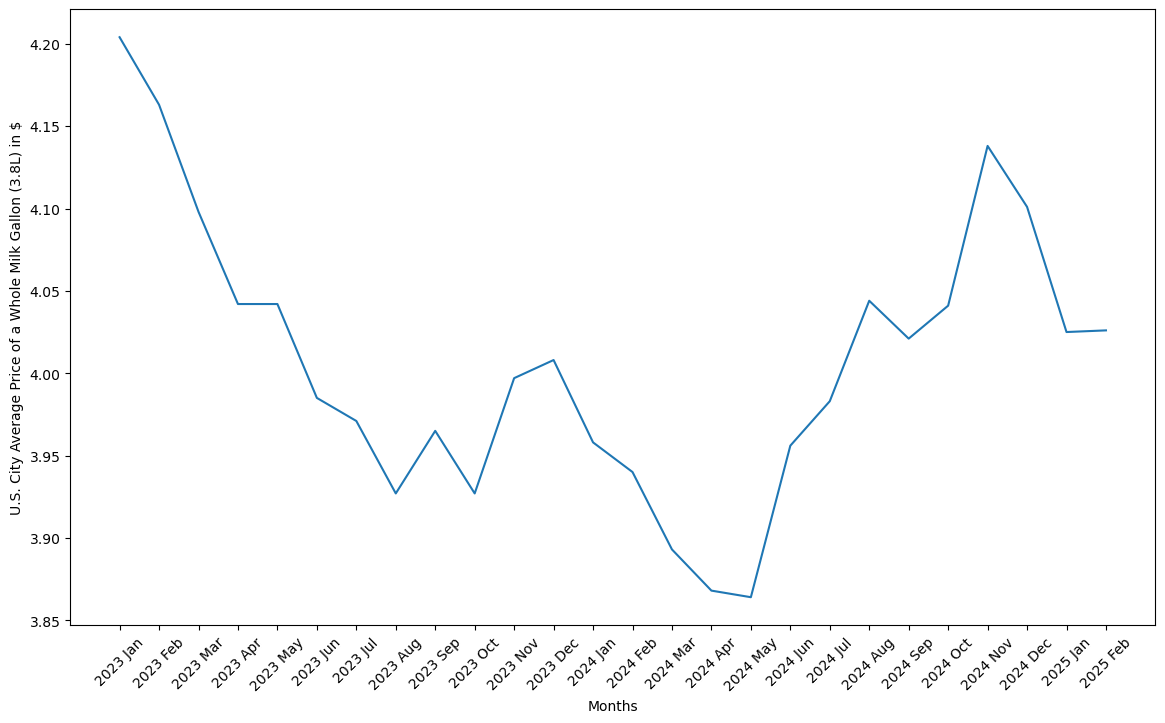

In [21]:
plt.figure(figsize=(14, 8))
plt.plot(milk['Label'], milk['Value'])
plt.xticks(rotation = 45)
plt.ylabel('U.S. City Average Price of a Whole Milk Gallon (3.8L) in $')
plt.xlabel('Months')
plt.show()

In [24]:
egg = pd.read_csv('eggs.csv') 
egg.head()

,Series ID,Year,Period,Label,Value
0,APU0000708111,2023,M01,2023 Jan,4.823
1,APU0000708111,2023,M02,2023 Feb,4.211
2,APU0000708111,2023,M03,2023 Mar,3.446
3,APU0000708111,2023,M04,2023 Apr,3.270
4,APU0000708111,2023,M05,2023 May,2.666


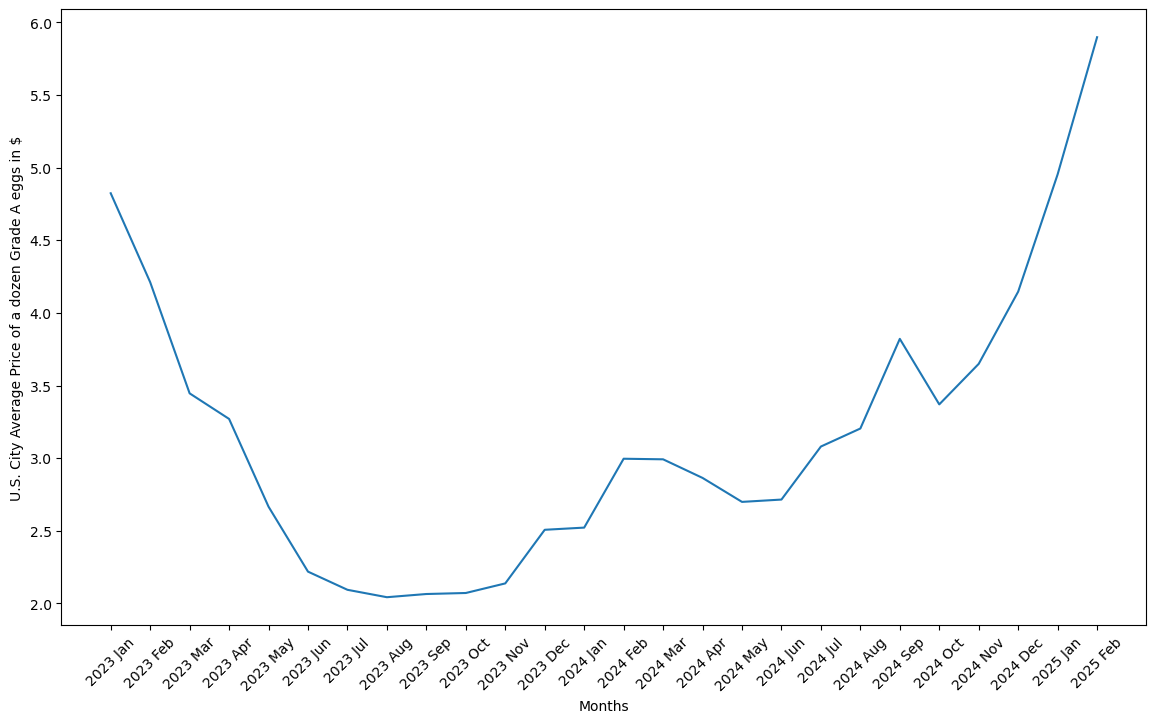

In [25]:
plt.figure(figsize=(14, 8))
plt.plot(egg['Label'], egg['Value'])
plt.xticks(rotation = 45)
plt.ylabel('U.S. City Average Price of a dozen Grade A eggs in $')
plt.xlabel('Months')
plt.show()